Remove Invalid Dates

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Read the CSV file into a pandas DataFrame
df = pd.read_csv('data.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with invalid dates
valid_dates_df = df[df['Date'].notnull()]

# Save the filtered DataFrame to a new CSV file
valid_dates_df.to_csv('v1.csv', index=False)




Remove Duplicate Rows

In [31]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('v1.csv')

# Find duplicate rows
duplicate_rows = data[data.duplicated()]

# Save duplicate rows to a new CSV file
duplicate_rows.to_csv('Duplicate_rows.csv', index=False)

# Drop duplicate rows to get unique rows
unique_rows = data.drop_duplicates()

# Save unique rows to a new CSV file
unique_rows.to_csv('v2.csv', index=False)

print("Unique rows saved to 'unique_rows.csv'")
print("Duplicate rows saved to 'duplicate_rows.csv'")


Unique rows saved to 'unique_rows.csv'
Duplicate rows saved to 'duplicate_rows.csv'


Convert Altert To Numerical Data

In [32]:
import pandas as pd

data = pd.read_csv("v2.csv")

alert_mapping = {
    "cas_ldw": 1,
    "cas_hmw": 2,
    "cas_fcw": 3,
    "cas_pcw": 4
}

data['Alert'] = data['Alert'].map(alert_mapping).fillna(0)

data.to_csv("v3.csv", index=False)
data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed
0,1,2022-06-01,05:36:36,12.887403,80.083412,2846,48
1,1,2022-06-01,05:36:47,12.892586,80.085794,2846,58
2,1,2022-06-01,05:37:04,12.894932,80.087564,2846,57
3,1,2022-06-01,05:37:31,12.898267,80.090062,2846,49
4,1,2022-06-01,05:38:08,12.901594,80.092538,2846,58


Convert Time To Morning, Afternoon, Evening, Night Catagories

In [33]:
import pandas as pd

# Load the CSV data into a pandas DataFrame
data = pd.read_csv('v3.csv')

# Define time range categories
time_ranges = {
    (0, 12): 'Morning',
    (12, 17): 'Afternoon',
    (17, 20): 'Evening',
    (20, 24): 'Night'
}

# Add a new column for time range
data['TimeRange'] = None

# Convert timestamp strings to datetime objects
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%Y-%m-%d %H:%M:%S')

# Assign time ranges based on timestamp
for index, row in data.iterrows():
    timestamp = row['Timestamp']
    for range_start, range_end in time_ranges.keys():
        if range_start <= timestamp.hour < range_end:
            data.at[index, 'TimeRange'] = time_ranges[(range_start, range_end)]
            break

# Group data by time range
grouped_data = data.groupby('TimeRange')

# Print the results
for time_range, group in grouped_data:
    for index, row in group.iterrows():
        # Exclude Timestamp column from the output
        row_without_timestamp = row.drop('Timestamp')

# Save the modified DataFrame to a new CSV file
data_without_timestamp = data.drop('Timestamp', axis=1)
data_without_timestamp.to_csv('v4.csv', index=False)


Convert Morning, Afternoon, Evening, Night Catagories to Numerical Data

In [34]:
import pandas as pd

# Read the CSV file into a Pandas DataFrame
data = pd.read_csv('v4.csv')

# Define a mapping of time ranges to numerical values
time_range_mapping = {
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
}

# Create a new column 'TimeRangeNumeric' using the mapping
data['TimeRangeNumeric'] = data['TimeRange'].map(time_range_mapping)

# Save the modified DataFrame back to a CSV file
data.to_csv('v5.csv', index=False)


Convert Types of data

In [35]:
#Convert Types of data
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S')
data["Alert"] = data["Alert"].astype(int)
# Save the modified DataFrame back to a CSV file
data.to_csv('v5.csv', index=False)

Print Data Type

In [36]:
data.dtypes

Alert                        int32
Date                datetime64[ns]
Time                datetime64[ns]
Lat                        float64
Long                       float64
Vehicle                      int64
Speed                        int64
TimeRange                   object
TimeRangeNumeric             int64
dtype: object

In [37]:
data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed,TimeRange,TimeRangeNumeric
0,1,2022-06-01,1900-01-01 05:36:36,12.887403,80.083412,2846,48,Morning,1
1,1,2022-06-01,1900-01-01 05:36:47,12.892586,80.085794,2846,58,Morning,1
2,1,2022-06-01,1900-01-01 05:37:04,12.894932,80.087564,2846,57,Morning,1
3,1,2022-06-01,1900-01-01 05:37:31,12.898267,80.090062,2846,49,Morning,1
4,1,2022-06-01,1900-01-01 05:38:08,12.901594,80.092538,2846,58,Morning,1


# EDA

In [38]:
data['Alert'].unique()

array([1, 2, 3, 4])

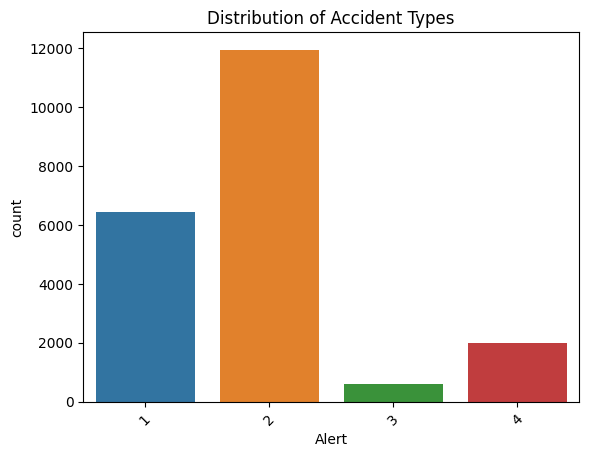

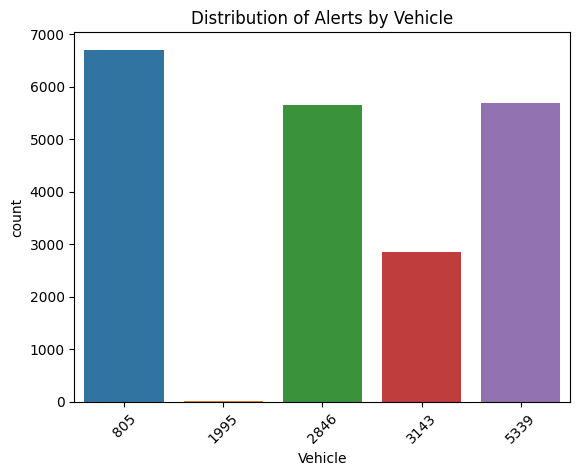

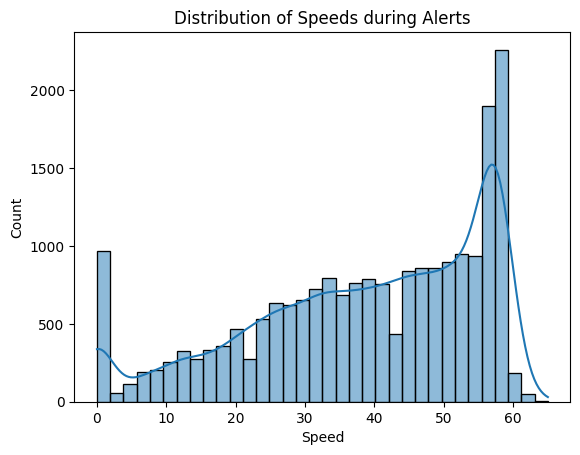

In [39]:
# Univariate analysis for categorical variables
sns.countplot(data=data, x='Alert')
plt.xticks(rotation=45)
plt.title('Distribution of Accident Types')
plt.show()

sns.countplot(data=data, x='Vehicle')
plt.xticks(rotation=45)
plt.title('Distribution of Alerts by Vehicle')
plt.show()

# Univariate analysis for numerical variables
sns.histplot(data=data, x='Speed', kde=True)
plt.title('Distribution of Speeds during Alerts')
plt.show()


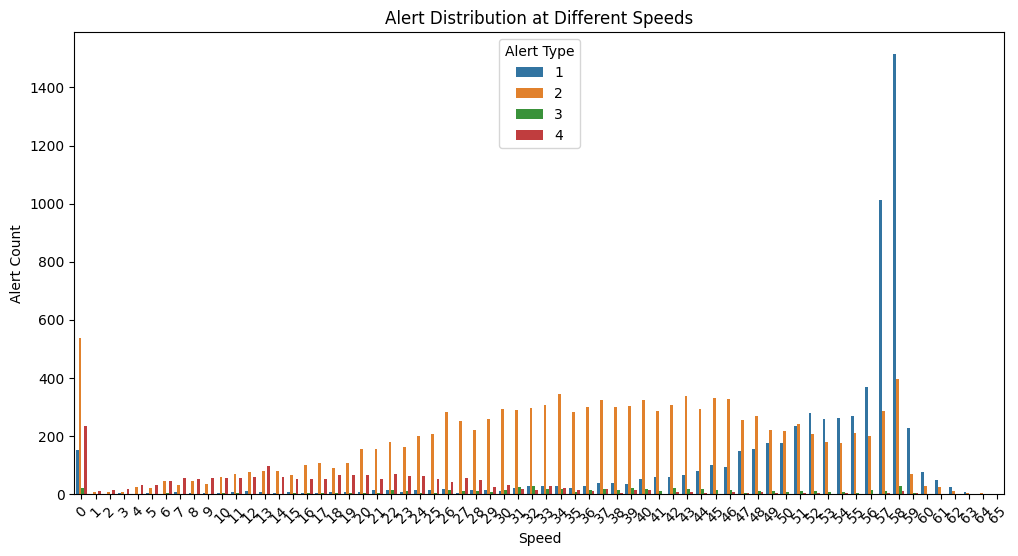

In [40]:
# Group data by speed and alert type, then calculate the count of each alert type
speed_alert_type_counts = data.groupby(['Speed', 'Alert'])['Alert'].count().reset_index(name='AlertCount')

# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=speed_alert_type_counts, x='Speed', y='AlertCount', hue='Alert')
plt.title('Alert Distribution at Different Speeds')
plt.xlabel('Speed')
plt.ylabel('Alert Count')
plt.legend(title='Alert Type')
plt.xticks(rotation=45)
plt.show()

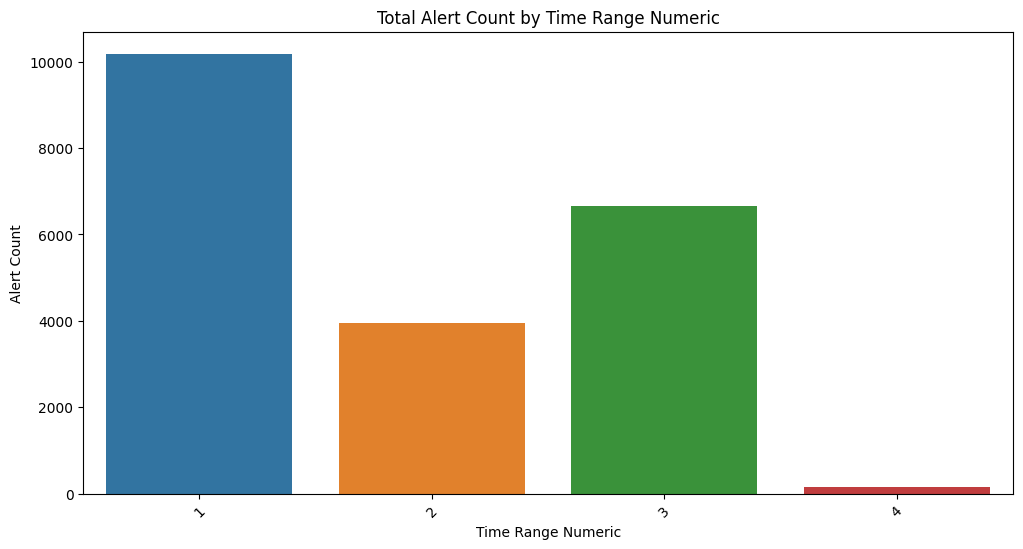

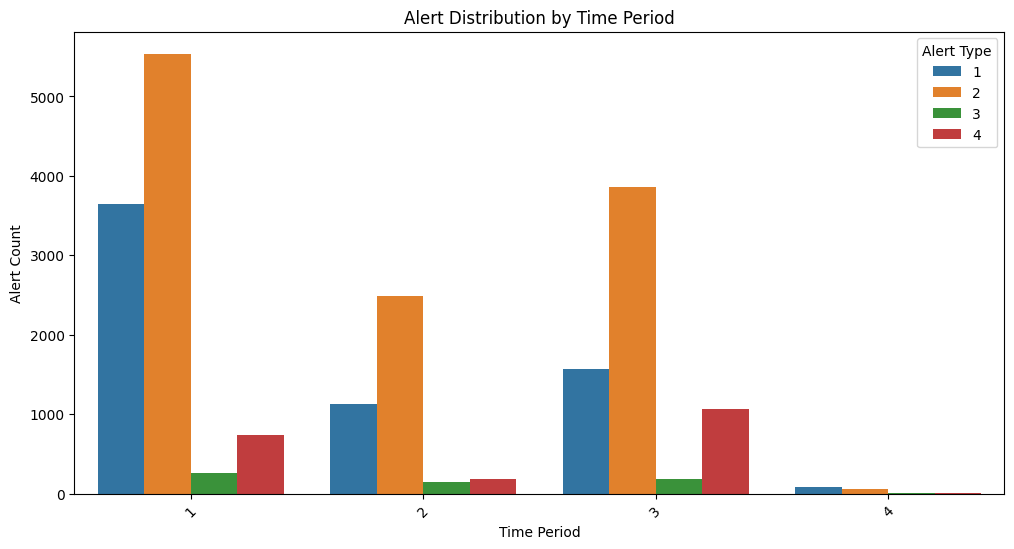

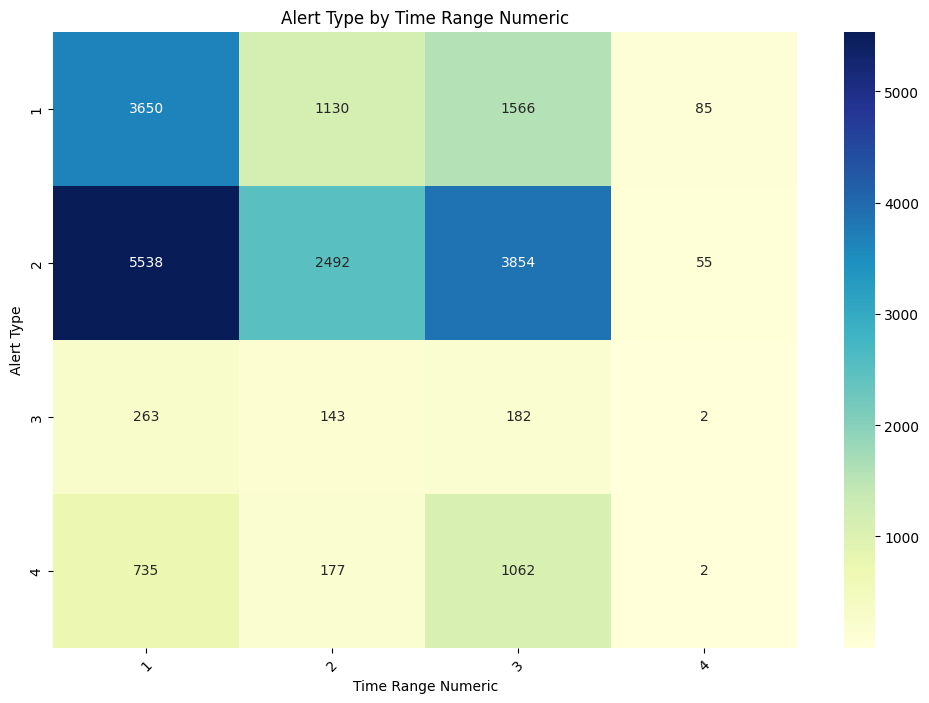

In [41]:
# Create a bar plot for total alert count by time range numeric
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='TimeRangeNumeric')
plt.title('Total Alert Count by Time Range Numeric')
plt.xlabel('Time Range Numeric')
plt.ylabel('Alert Count')
plt.xticks(rotation=45)
plt.show()



# Group data by time period and alert type, then calculate the count of alerts for each combination
time_alert_counts = data.groupby(['TimeRangeNumeric', 'Alert'])['Alert'].count().reset_index(name='AlertCount')
# Create a bar plot
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(data=time_alert_counts, x='TimeRangeNumeric', y='AlertCount', hue='Alert')
plt.title('Alert Distribution by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Alert Count')
plt.xticks(rotation=45)
plt.legend(title='Alert Type')
plt.show()




# Create a pivot table to count the occurrences of each alert type in each time range numeric
alert_time_pivot = data.pivot_table(index='Alert', columns='TimeRangeNumeric', values='Date', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(alert_time_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Alert Type by Time Range Numeric')
plt.xlabel('Time Range Numeric')
plt.ylabel('Alert Type')
plt.xticks(rotation=45)
plt.show()


In [42]:

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract the day of the week (0: Monday, 6: Sunday)
data['DayOfWeekNumeric'] = data['Date'].dt.dayofweek

# Map numeric day of the week to actual day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = data['DayOfWeekNumeric'].map(lambda x: day_names[x])

data.head()

,Alert,Date,Time,Lat,Long,Vehicle,Speed,TimeRange,TimeRangeNumeric,DayOfWeekNumeric,DayOfWeek
0,1,2022-06-01,1900-01-01 05:36:36,12.887403,80.083412,2846,48,Morning,1,2,Wednesday
1,1,2022-06-01,1900-01-01 05:36:47,12.892586,80.085794,2846,58,Morning,1,2,Wednesday
2,1,2022-06-01,1900-01-01 05:37:04,12.894932,80.087564,2846,57,Morning,1,2,Wednesday
3,1,2022-06-01,1900-01-01 05:37:31,12.898267,80.090062,2846,49,Morning,1,2,Wednesday
4,1,2022-06-01,1900-01-01 05:38:08,12.901594,80.092538,2846,58,Morning,1,2,Wednesday


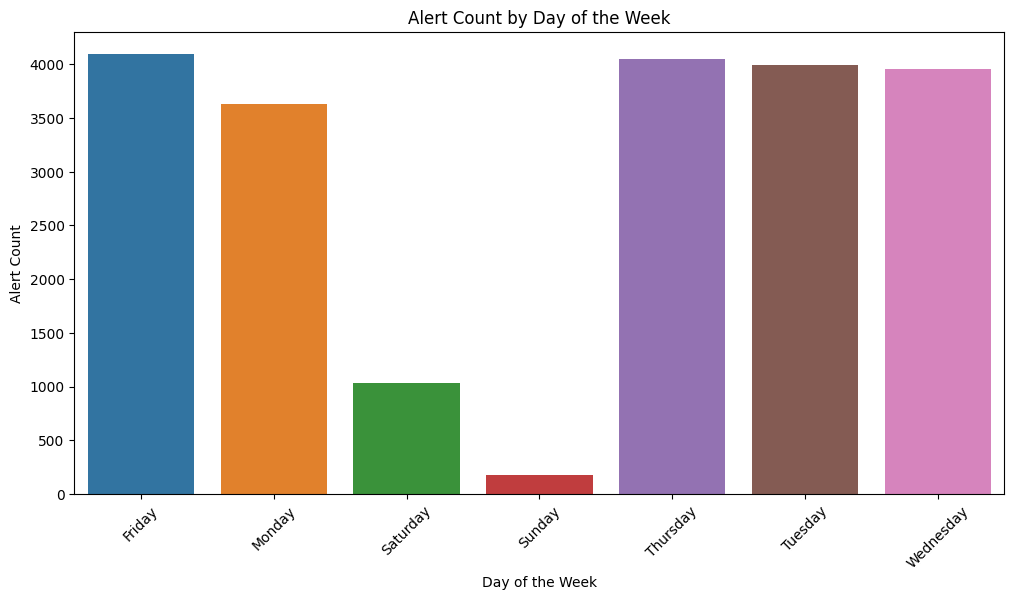

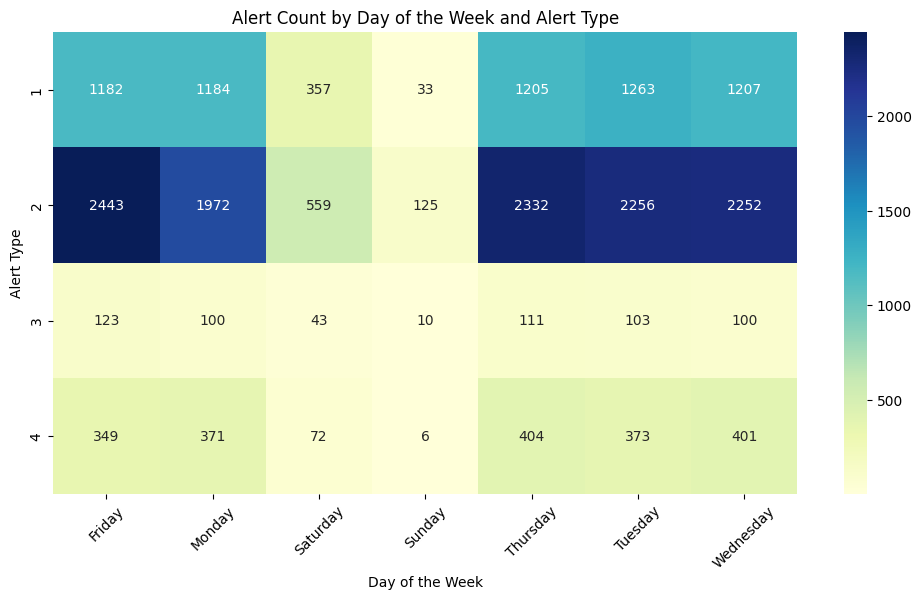

In [43]:
# Group data by day of the week and analyze different variables
daywise_analysis = data.groupby('DayOfWeek').agg({
    'Alert': 'count',        # Count of alerts
    'Speed': 'mean',         # Average speed
    'TimeRangeNumeric': 'mean'  # Average time range numeric
}).reset_index()

# Create visualizations
plt.figure(figsize=(12, 6))

# Plot count of alerts by day of the week
sns.barplot(data=daywise_analysis, x='DayOfWeek', y='Alert')
plt.title('Alert Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Alert Count')
plt.xticks(rotation=45)
plt.show()

# Alert count with type of alert vs days of week

# Map numeric day of the week to actual day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['DayOfWeek'] = data['DayOfWeekNumeric'].map(lambda x: day_names[x])

# Create a pivot table to count the occurrences of each alert type on each day
alert_day_pivot = data.pivot_table(index='Alert', columns='DayOfWeek', values='TimeRangeNumeric', aggfunc='count', fill_value=0)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(alert_day_pivot, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Alert Count by Day of the Week and Alert Type')
plt.xlabel('Day of the Week')
plt.ylabel('Alert Type')
plt.xticks(rotation=45)
plt.show()


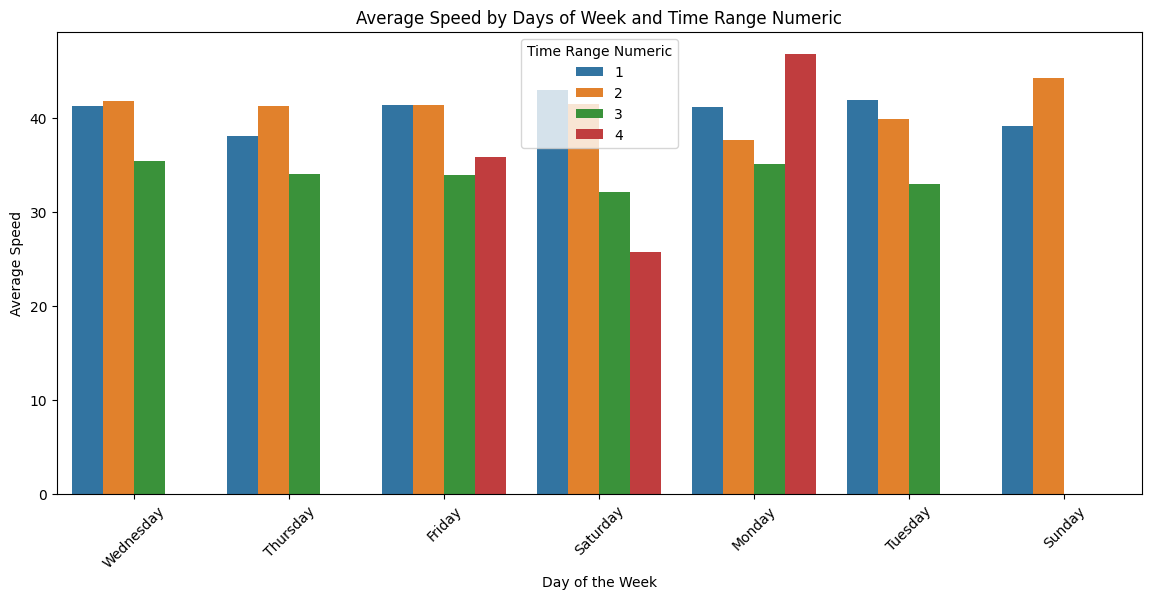

In [44]:

# Create a bar plot for average speed by days of week and time range numeric
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='DayOfWeek', y='Speed', hue='TimeRangeNumeric', errorbar=None)
plt.title('Average Speed by Days of Week and Time Range Numeric')
plt.xlabel('Day of the Week')
plt.ylabel('Average Speed')
plt.xticks(rotation=45)
plt.legend(title='Time Range Numeric')
plt.show()


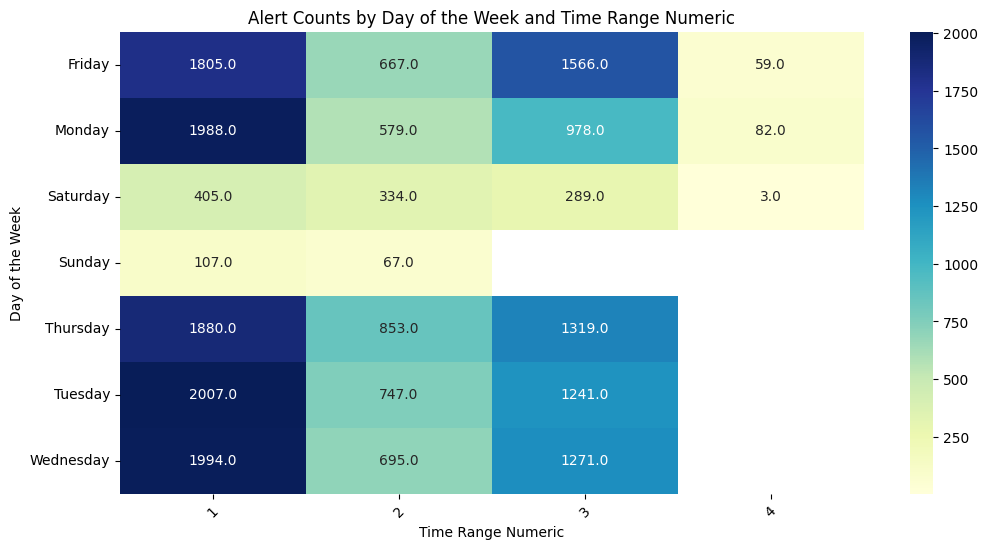

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named 'data'

# Group data by DayOfWeek and TimeRangeNumeric, and count the alerts
alert_counts = data.groupby(['DayOfWeek', 'TimeRangeNumeric'])['Alert'].count().reset_index()

# Pivot the data for plotting
alert_counts_pivot = alert_counts.pivot(index='DayOfWeek', columns='TimeRangeNumeric', values='Alert')

# Create a heatmap to visualize the data
plt.figure(figsize=(12, 6))
sns.heatmap(alert_counts_pivot, cmap='YlGnBu', annot=True, fmt='.1f', cbar=True)
plt.title('Alert Counts by Day of the Week and Time Range Numeric')
plt.xlabel('Time Range Numeric')
plt.ylabel('Day of the Week')
plt.xticks(rotation=45)
plt.show()


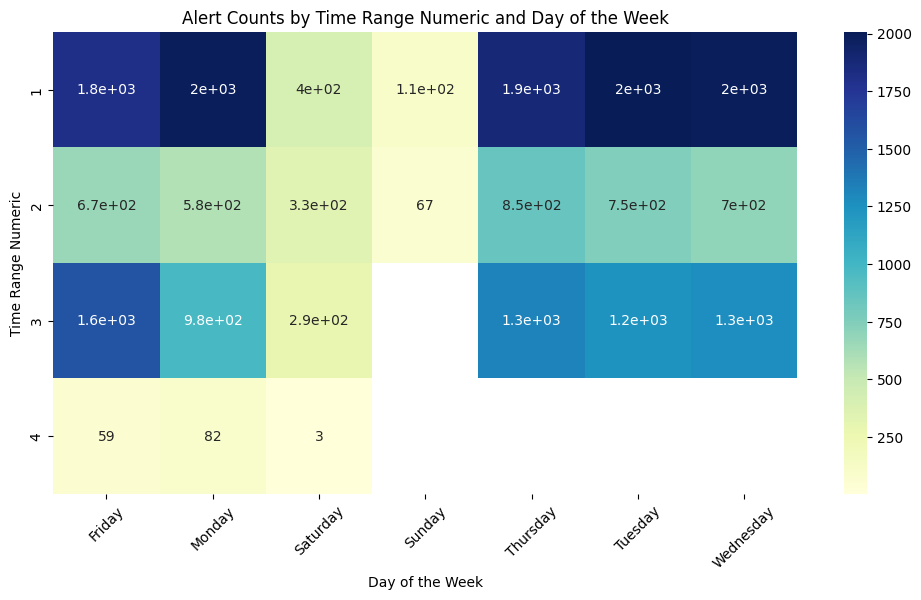

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is loaded into a DataFrame named 'data'

# Group data by DayOfWeek and TimeRangeNumeric, and count the alerts
alert_counts = data.groupby(['DayOfWeek', 'TimeRangeNumeric'])['Alert'].count().reset_index()

# Pivot the data for plotting
alert_counts_pivot = alert_counts.pivot(index='TimeRangeNumeric', columns='DayOfWeek', values='Alert')

# Create a heatmap to visualize the data
plt.figure(figsize=(12, 6))
sns.heatmap(alert_counts_pivot, cmap='YlGnBu', annot=True, cbar=True)
plt.title('Alert Counts by Time Range Numeric and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Time Range Numeric')
plt.xticks(rotation=45)
plt.show()


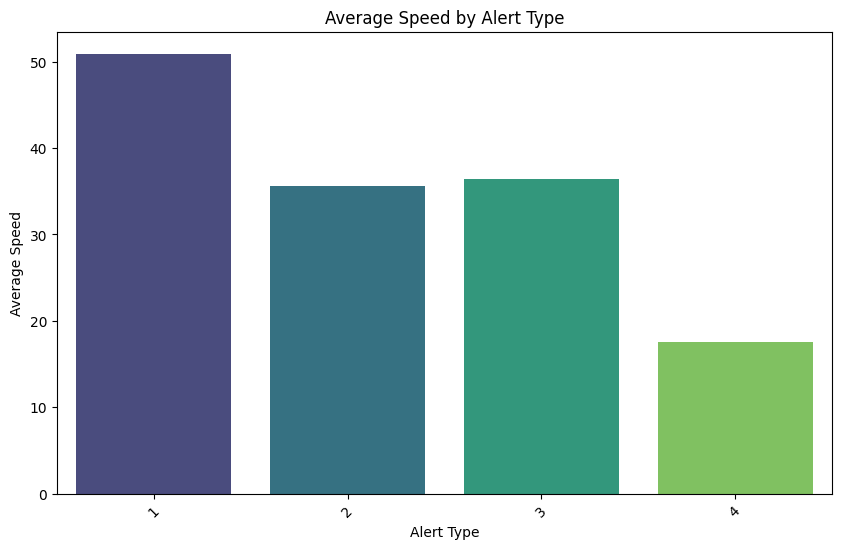

In [47]:


# Calculate the average speed for each alert type
avg_speed_by_alert = data.groupby('Alert')['Speed'].mean().reset_index()

# Sort the data by average speed
avg_speed_by_alert = avg_speed_by_alert.sort_values(by='Speed', ascending=False)

# Create a bar plot for average speed by alert type
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_speed_by_alert, x='Alert', y='Speed', palette='viridis')
plt.title('Average Speed by Alert Type')
plt.xlabel('Alert Type')
plt.ylabel('Average Speed')
plt.xticks(rotation=45)
plt.show()


In [48]:
import pandas as pd
import numpy as np



# Define a function to calculate safe and danger speeds
def[] calculate_safe_danger_speeds(alert_data, iqr_multiplier=1.5):
    q1 = np.percentile(alert_data, 25)
    q3 = np.percentile(alert_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    safe_speed = np.median(alert_data[(alert_data >= lower_bound) & (alert_data <= upper_bound)])
    danger_speed = np.max(alert_data)
    
    return safe_speed, danger_speed

# Calculate safe and danger speeds for each alert type
alert_types = data['Alert'].unique()
alert_speed_ranges = {}

for alert_type in alert_types:
    alert_data = data[data['Alert'] == alert_type]['Speed']
    safe_speed, danger_speed = calculate_safe_danger_speeds(alert_data)
    alert_speed_ranges[alert_type] = {'SafeSpeed': safe_speed, 'DangerSpeed': danger_speed}

# Print the results
for alert_type, speeds in alert_speed_ranges.items():
    print(f"Alert Type: {alert_type}, Safe Speed: {speeds['SafeSpeed']:.2f}, Danger Speed: {speeds['DangerSpeed']:.2f}")





# Group the data by Alert and TimeRangeNumeric and calculate the required statistics
alert_time_stats = data.groupby(['Alert', 'TimeRangeNumeric'])['Speed'].agg(['mean', 'max', 'min']).reset_index()

# Print the resulting DataFrame
print(alert_time_stats)


SyntaxError: invalid syntax (1280196509.py, line 7)

In [ ]:
# Define a function to calculate safe and danger speeds
def calculate_safe_danger_speeds(alert_time_data, iqr_multiplier=1.5):
    q1 = np.percentile(alert_time_data, 25)
    q3 = np.percentile(alert_time_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    safe_speed = np.median(alert_time_data[(alert_time_data >= lower_bound) & (alert_time_data <= upper_bound)])
    danger_speed = np.max(alert_time_data)
    
    return safe_speed, danger_speed

# Calculate safe and danger speeds for each combination of alert type and time range numeric
alert_types = data['Alert'].unique()
time_ranges = data['TimeRangeNumeric'].unique()
alert_time_speed_ranges = {}

for alert_type in alert_types:
    for time_range in time_ranges:
        alert_time_data = data[(data['Alert'] == alert_type) & (data['TimeRangeNumeric'] == time_range)]['Speed']
        safe_speed, danger_speed = calculate_safe_danger_speeds(alert_time_data)
        alert_time_speed_ranges[(alert_type, time_range)] = {'SafeSpeed': safe_speed, 'DangerSpeed': danger_speed}

# Print the results
for (alert_type, time_range), speeds in alert_time_speed_ranges.items():
    print(f"Alert Type: {alert_type}, Time Range: {time_range}, Safe Speed: {speeds['SafeSpeed']:.2f}, Danger Speed: {speeds['DangerSpeed']:.2f}")


Alert Type: 1, Time Range: 1, Safe Speed: 56.00, Danger Speed: 65.00
Alert Type: 1, Time Range: 2, Safe Speed: 56.00, Danger Speed: 65.00
Alert Type: 1, Time Range: 3, Safe Speed: 57.00, Danger Speed: 64.00
Alert Type: 1, Time Range: 4, Safe Speed: 57.00, Danger Speed: 62.00
Alert Type: 2, Time Range: 1, Safe Speed: 39.00, Danger Speed: 64.00
Alert Type: 2, Time Range: 2, Safe Speed: 41.00, Danger Speed: 64.00
Alert Type: 2, Time Range: 3, Safe Speed: 33.00, Danger Speed: 64.00
Alert Type: 2, Time Range: 4, Safe Speed: 27.00, Danger Speed: 60.00
Alert Type: 3, Time Range: 1, Safe Speed: 37.00, Danger Speed: 61.00
Alert Type: 3, Time Range: 2, Safe Speed: 40.00, Danger Speed: 59.00
Alert Type: 3, Time Range: 3, Safe Speed: 35.00, Danger Speed: 63.00
Alert Type: 3, Time Range: 4, Safe Speed: 41.50, Danger Speed: 42.00
Alert Type: 4, Time Range: 1, Safe Speed: 19.00, Danger Speed: 61.00
Alert Type: 4, Time Range: 2, Safe Speed: 10.00, Danger Speed: 60.00
Alert Type: 4, Time Range: 3, Safe

In [ ]:
# Define a function to calculate safe and danger speeds
def calculate_safe_danger_speeds(alert_time_day_data, iqr_multiplier=1.5):
    q1 = np.percentile(alert_time_day_data, 25)
    q3 = np.percentile(alert_time_day_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    
    safe_speed = np.median(alert_time_day_data[(alert_time_day_data >= lower_bound) & (alert_time_day_data <= upper_bound)])
    danger_speed = np.max(alert_time_day_data)
    
    return safe_speed, danger_speed



############################
# Calculate safe and danger speeds for each combination of alert type, time range numeric, and day of the week
alert_types = data['Alert'].unique()
time_ranges = data['TimeRangeNumeric'].unique()
days_of_week = data['DayOfWeek'].unique()
alert_time_day_speed_ranges = {}

for alert_type in alert_types:
    for time_range in time_ranges:
        for day_of_week in days_of_week:
            alert_time_day_data = data[(data['Alert'] == alert_type) & (data['TimeRangeNumeric'] == time_range) & (data['DayOfWeek'] == day_of_week)]['Speed']
            if len(alert_time_day_data) > 0:  # Check if there are data points for the combination
                safe_speed, danger_speed = calculate_safe_danger_speeds(alert_time_day_data)
                alert_time_day_speed_ranges[(alert_type, time_range, day_of_week)] = {'SafeSpeed': safe_speed, 'DangerSpeed': danger_speed}

# Print the results
for (alert_type, time_range, day_of_week), speeds in alert_time_day_speed_ranges.items():
    print(f"Alert Type: {alert_type}, Time Range: {time_range}, Day of the Week: {day_of_week}, Safe Speed: {speeds['SafeSpeed']:.2f}, Danger Speed: {speeds['DangerSpeed']:.2f}")
#########

alert_types = data['Alert'].unique()
time_ranges = data['TimeRangeNumeric'].unique()
days_of_week = data['DayOfWeek'].unique()
alert_time_day_speed_ranges = []

for alert_type in alert_types:
    for time_range in time_ranges:
        for day_of_week in days_of_week:
            alert_time_day_data = data[(data['Alert'] == alert_type) & (data['TimeRangeNumeric'] == time_range) & (data['DayOfWeek'] == day_of_week)]['Speed']
            if len(alert_time_day_data) > 0:
                safe_speed, danger_speed = calculate_safe_danger_speeds(alert_time_day_data)
                alert_time_day_speed_ranges.append({
                    'Alert Type': alert_type,
                    'Time Range': time_range,
                    'Day of the Week': day_of_week,
                    'Safe Speed': safe_speed,
                    'Danger Speed': danger_speed
                })

# Create a DataFrame
result_df = pd.DataFrame(alert_time_day_speed_ranges)

# Print the formatted DataFrame
print(result_df)


Alert Type: 1, Time Range: 1, Day of the Week: Wednesday, Safe Speed: 56.00, Danger Speed: 64.00
Alert Type: 1, Time Range: 1, Day of the Week: Thursday, Safe Speed: 55.00, Danger Speed: 62.00
Alert Type: 1, Time Range: 1, Day of the Week: Friday, Safe Speed: 56.00, Danger Speed: 63.00
Alert Type: 1, Time Range: 1, Day of the Week: Saturday, Safe Speed: 57.00, Danger Speed: 62.00
Alert Type: 1, Time Range: 1, Day of the Week: Monday, Safe Speed: 57.00, Danger Speed: 63.00
Alert Type: 1, Time Range: 1, Day of the Week: Tuesday, Safe Speed: 56.00, Danger Speed: 65.00
Alert Type: 1, Time Range: 1, Day of the Week: Sunday, Safe Speed: 52.00, Danger Speed: 61.00
Alert Type: 1, Time Range: 2, Day of the Week: Wednesday, Safe Speed: 56.00, Danger Speed: 62.00
Alert Type: 1, Time Range: 2, Day of the Week: Thursday, Safe Speed: 55.00, Danger Speed: 62.00
Alert Type: 1, Time Range: 2, Day of the Week: Friday, Safe Speed: 56.00, Danger Speed: 61.00
Alert Type: 1, Time Range: 2, Day of the Week: 

    Alert Type  Time Range Day of the Week  Safe Speed  Danger Speed
0            1           1       Wednesday        56.0            64
1            1           1        Thursday        55.0            62
2            1           1          Friday        56.0            63
3            1           1        Saturday        57.0            62
4            1           1          Monday        57.0            63
..         ...         ...             ...         ...           ...
83           4           3        Saturday        13.0            47
84           4           3          Monday        18.0            59
85           4           3         Tuesday        15.0            61
86           4           4          Friday        28.0            28
87           4           4          Monday        50.0            50

[88 rows x 5 columns]


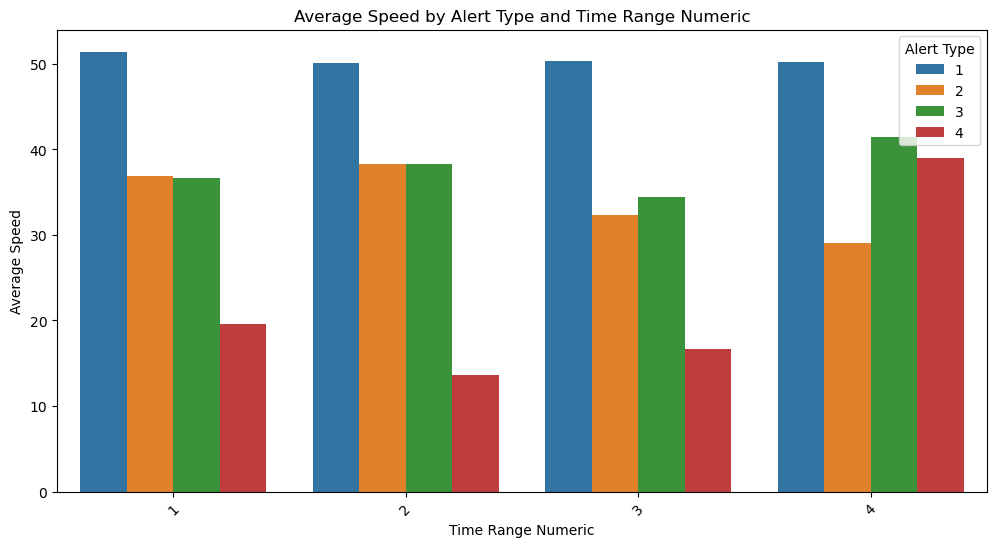

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot for average speed by alert type and time range numeric
plt.figure(figsize=(12, 6))
sns.barplot(data=alert_time_stats, x='TimeRangeNumeric', y='mean', hue='Alert', errorbar=None)
plt.title('Average Speed by Alert Type and Time Range Numeric')
plt.xlabel('Time Range Numeric')
plt.ylabel('Average Speed')
plt.xticks(rotation=45)
plt.legend(title='Alert Type')
plt.show()


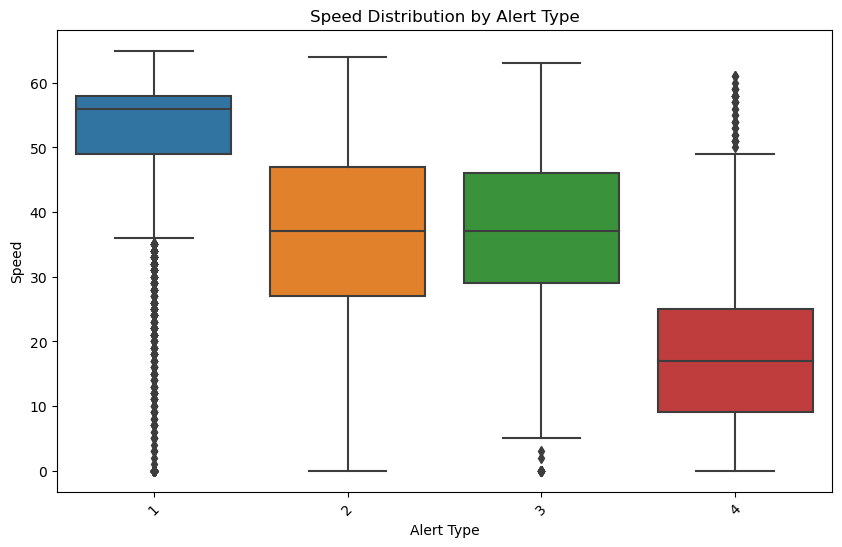

In [ ]:
# Create a box plot or violin plot to compare speeds for each alert type
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Alert', y='Speed')
# OR use a violin plot for more detailed distribution insights:
# sns.violinplot(data=data, x='Alert', y='Speed')
plt.title('Speed Distribution by Alert Type')
plt.xlabel('Alert Type')
plt.ylabel('Speed')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd


# Filter for LDW alerts on Mondays (assuming 'Alert' column contains 1 for LDW alerts and 'DayOfWeek' column contains weekdays as strings)
ldw_alerts_monday = data[(data['Alert'] == 2) & (data['DayOfWeek'] == 'Monday')]

# Group the filtered data by 'TimeRangeNumeric' and calculate the count of alerts in each time range numeric
danger_zones = ldw_alerts_monday.groupby('TimeRangeNumeric').agg({'Lat': 'mean', 'Long': 'median', 'Alert': 'count'}).reset_index()

# Rename the columns for clarity
danger_zones.columns = ['TimeRangeNumeric', 'Average Lat', 'Average Long', 'Alert Count']

# Sort the data by alert count in descending order to find the danger zones
danger_zones = danger_zones.sort_values(by='Alert Count', ascending=False)

# Display the danger zones
print(danger_zones)


   TimeRangeNumeric  Average Lat  Average Long  Alert Count
0                 1    12.926748     80.142617         1093
2                 3    12.967861     80.199353          655
1                 2    12.922582     80.122255          508


In [ ]:
import pandas as pd
import folium
from folium.plugins import HeatMap



# Filter for LDW alerts on Mondays (assuming 'Alert' column contains 1 for LDW alerts and 'DayOfWeek' column contains weekdays as strings)
ldw_alerts_monday = data[(data['Alert'] == 1) & (data['DayOfWeek'] == 'Monday')]

# Create a Folium map centered at a representative location (e.g., the average latitude and longitude of all data points)
m = folium.Map(location=[ldw_alerts_monday['Lat'].mean(), ldw_alerts_monday['Long'].mean()], zoom_start=10)

# Create a list of tuples containing the latitude and longitude of LDW alerts
alert_locations = list(zip(ldw_alerts_monday['Lat'], ldw_alerts_monday['Long']))

# Create a HeatMap layer to visualize the alert concentrations
HeatMap(alert_locations).add_to(m)

# Display the Folium map with danger zones
m.save('ldw_alerts_monday_map.html')  # Save the map as an HTML file


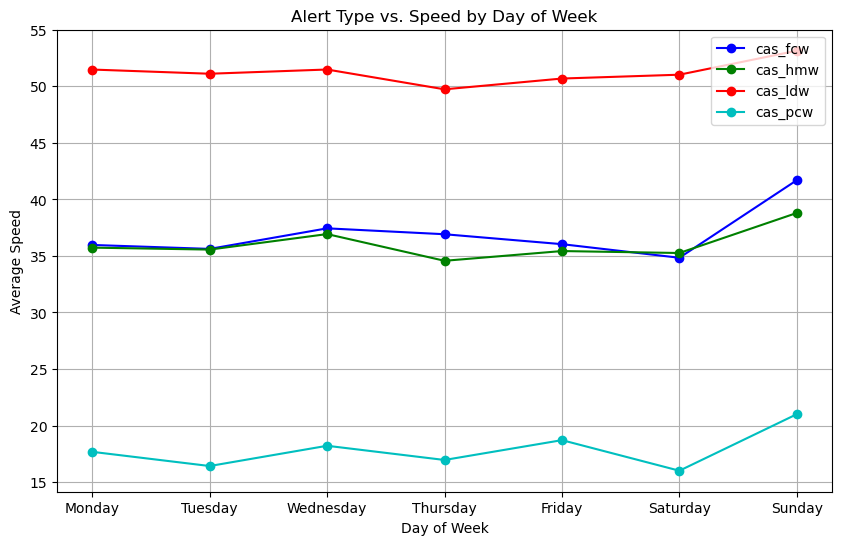

In [ ]:


# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Create a new column for the day of the week (0 = Monday, 6 = Sunday)
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Define a dictionary to map alert types to their corresponding names
alert_type_mapping = {
    1: "cas_ldw",
    2: "cas_hmw",
    3: "cas_fcw",
    4: "cas_pcw"
}
data['AlertType'] = data['Alert'].map(alert_type_mapping)

# Group the data by 'AlertType' and 'DayOfWeek' and calculate the average speed
grouped_data = data.groupby(['AlertType', 'DayOfWeek'])['Speed'].mean().reset_index()
# Create a pivot table for plotting
pivot_data = grouped_data.pivot(index='DayOfWeek', columns='AlertType', values='Speed')

# Define colors for each alert type
colors = ['b', 'g', 'r', 'c']

# Create the plot
plt.figure(figsize=(10, 6))
for alert_type, color in zip(pivot_data.columns, colors):
    plt.plot(pivot_data.index, pivot_data[alert_type], label=alert_type, color=color, marker='o')

# Customize the plot
plt.xlabel('Day of Week')
plt.ylabel('Average Speed')
plt.title('Alert Type vs. Speed by Day of Week')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend()

# Show the plot
plt.grid()
plt.show()

